## Neural Network
In this exercise, we will use Neural Networks to perform Linear Regression.

The objective is to build a 2-hidden layers fully connected neural network (a.k.a multilayer perceptron) with TensorFlow using some of the higher-level wrappers (tf.estimators, tf.layers, tf.metrics, ...), you can check 'neural_network_raw' example for a raw, and more detailed TensorFlow implementation.

Further, we will use the MNIST Dataset used in the last exercise.

In [1]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Set the parameters.

In [2]:
learning_rate = 0.1
num_steps = 300
batch_size = 128

# Network Parameters
n_hidden_1 = 128 # 1st layer number of neurons
n_hidden_2 = 128 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

Define the input function for training.

In [3]:
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

Define the neural network.

In [4]:
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 128 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # Hidden fully connected layer with 128 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

Define the model function (following __[TF Estimator Template](https://www.tensorflow.org/api_docs/python/tf/estimator/Estimator)__).

In [5]:
def model_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

Build the Estimator.

In [6]:
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {}


Train the Model.

In [7]:
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/2x/fsd9vxyj7q111h9x390gv1lw0000gn/T/tmpa56kbf3k/model.ckpt.
INFO:tensorflow:loss = 2.5118, step = 1
INFO:tensorflow:global_step/sec: 216.558
INFO:tensorflow:loss = 0.394435, step = 101 (0.463 sec)
INFO:tensorflow:global_step/sec: 197.468
INFO:tensorflow:loss = 0.362629, step = 201 (0.506 sec)
INFO:tensorflow:Saving checkpoints for 300 into /var/folders/2x/fsd9vxyj7q111h9x390gv1lw0000gn/T/tmpa56kbf3k/model.ckpt.
INFO:tensorflow:Loss for final step: 0.305298.


Evaluate the Model. Define the input function for evaluating.

In [8]:
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2017-11-09-17:07:56
INFO:tensorflow:Restoring parameters from /var/folders/2x/fsd9vxyj7q111h9x390gv1lw0000gn/T/tmpa56kbf3k/model.ckpt-300
INFO:tensorflow:Finished evaluation at 2017-11-09-17:07:56
INFO:tensorflow:Saving dict for global step 300: accuracy = 0.904, global_step = 300, loss = 0.325106


{'accuracy': 0.90399998, 'global_step': 300, 'loss': 0.32510611}

We now test the prediction for 10000 images.

In [9]:
# Predict single images
n_images = 10000
# Get images from test set
test_images = mnist.test.images[:n_images]
test_labels = mnist.test.labels[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))
y_list = list(test_labels)

# Display
correct_count = 0
for i in range(n_images):
#     plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
#     plt.show()
#     print("Model prediction:", preds[i])
#     print("true value:",y_list[i])
    if preds[i] == y_list[i]:
        correct_count += 1
        
print("Testing accuracy:", float(correct_count)/float(n_images))
        

INFO:tensorflow:Restoring parameters from /var/folders/2x/fsd9vxyj7q111h9x390gv1lw0000gn/T/tmpa56kbf3k/model.ckpt-300
Testing accuracy: 0.904


## Q1. Plot training error and testing error vs steps 

For the same input settings, train and evaluate the model without regularization or dropout. Plot a graph with y axis being the training accuracy and test accuracy, and x-axis being the number of steps.

num_steps: 1
num_steps: 51
num_steps: 101
num_steps: 151
num_steps: 201
num_steps: 251
num_steps: 301
num_steps: 351
num_steps: 401
num_steps: 451
num_steps: 501
num_steps: 551
num_steps: 601
num_steps: 651
num_steps: 701
num_steps: 751


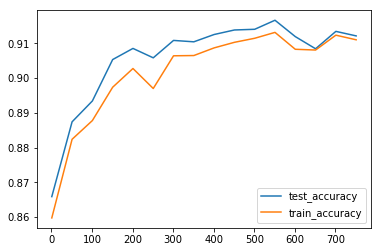

In [10]:
#------------------ Your code here -------------------#
tf.logging.set_verbosity(tf.logging.ERROR)

max_steps = 800
num_log_steps = 50
num_steps_array = list(range(1,max_steps,num_log_steps))
test_accuracy = []
train_accuracy = []

#define input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
x={'images': mnist.train.images}, y=mnist.train.labels,
batch_size=batch_size, num_epochs=None, shuffle=True)

#define input function for train error
train_error_fn = tf.estimator.inputs.numpy_input_fn(
x={'images': mnist.train.images}, y=mnist.train.labels,
batch_size=batch_size, shuffle=False)

#define input function for testing error
test_error_fn = tf.estimator.inputs.numpy_input_fn(
x={'images': mnist.test.images}, y=mnist.test.labels,
batch_size=batch_size, shuffle=False)

model = tf.estimator.Estimator(model_fn)

#for num_steps in num_steps_array:
for step_num in num_steps_array:
    print("num_steps:", step_num)
    
    #train model
    #model.train(input_fn, steps=num_steps)
    model.train(input_fn, steps=num_log_steps)

    #evaluate training accuracy
    train_accuracy.append(model.evaluate(train_error_fn)["accuracy"])

    #evaluate testing accuracy
    test_accuracy.append(model.evaluate(test_error_fn)["accuracy"])
    
import matplotlib.pyplot as plt

plt.plot(num_steps_array, test_accuracy, label = "test_accuracy")
plt.plot(num_steps_array, train_accuracy, label = "train_accuracy")
plt.legend()
plt.show()

# -----------------------------------------------------#

## Q2. Plot training error and testing error vs steps WITH regularization


For the same input settings, train and evaluate the model with regularization. 
By trial and error, choose a regularization parameter that improves the teset accuracy (change the architecture such as the number of layers and/or the number of nodes in th elayer, batch size, etc if you need to).
Plot a graph with y axis being the training accuracy and test accuracy, and x-axis being the number of steps.


Training...
step number: 1
step number: 51
step number: 101
step number: 151
step number: 201
step number: 251
step number: 301
step number: 351
step number: 401
step number: 451
step number: 501
step number: 551
step number: 601
step number: 651


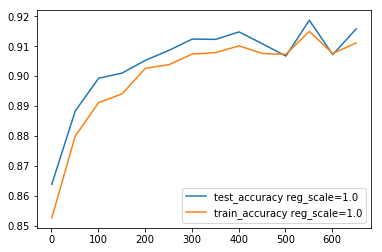

In [11]:
#------------------ Your code here -------------------#
def neural_net_reg(x_dict, reg_scale):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1, kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=reg_scale, scope=None))
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2, kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=reg_scale, scope=None))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer
    
def model_fn_reg(features, labels, params, mode):
    # Build the neural network
    #pass through regularization scale value to neural network constructor
    logits = neural_net_reg(features, reg_scale=params['reg_scale'])
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs


#*******************
#code from Q1
#modified to incorporate trial range of regularization scale values
#*******************


tf.logging.set_verbosity(tf.logging.ERROR)
import matplotlib.pyplot as plt

for r in [1.0]:         # regularization scale value of 1.0 was shown to perform best from [0.01, 0.1, 1.0, 10., 100.]
    max_steps = 700
    num_log_steps = 50
    num_steps_array = list(range(1,max_steps,num_log_steps))
    test_accuracy = []
    train_accuracy = []

    #define input function for training
    input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

    #define input function for train error
    train_error_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, shuffle=False)

    #define input function for testing error
    test_error_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)

    model = tf.estimator.Estimator(model_fn_reg, params={'reg_scale': r})
    
    print("Training...")
    #for num_steps in num_steps_array:
    for step_num in num_steps_array:
        print("step number:", step_num)

        #train model
        model.train(input_fn, steps=num_log_steps)

        #evaluate training accuracy
        train_accuracy.append(model.evaluate(train_error_fn)["accuracy"])

        #evaluate testing accuracy
        test_accuracy.append(model.evaluate(test_error_fn)["accuracy"])

    plt.plot(num_steps_array, test_accuracy, label = "test_accuracy reg_scale={}".format(r))
    plt.plot(num_steps_array, train_accuracy, label = "train_accuracy reg_scale={}".format(r))
    
plt.legend()
plt.show()

# -----------------------------------------------------#

## Q3. Plot training error and testing error vs steps with dropout


For the same input settings, train and evaluate the model with dropout but without regularization. 
Through trial-and-error find a dropout rate that improves the test accuracy (change the architecture such as the number of layers and/or the number of nodes in th elayer, batch size, etc if you need to).
Plot a graph with y axis being the training accuracy and test accuracy, and x-axis being the number of steps.

Training...
step number: 1
step number: 51
step number: 101
step number: 151
step number: 201
step number: 251
step number: 301
step number: 351
step number: 401
step number: 451
step number: 501
step number: 551
step number: 601
step number: 651


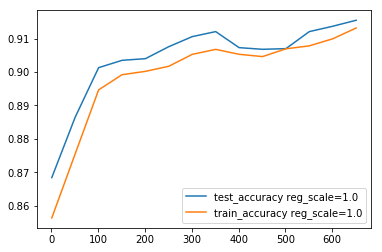

In [12]:
#------------------ Your code here -------------------#
def neural_net_reg(x_dict, reg_scale):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1, kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=reg_scale, scope=None))
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2, kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=reg_scale, scope=None))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer
    
def model_fn_reg(features, labels, params, mode):
    # Build the neural network
    #pass through regularization scale value to neural network constructor
    logits = neural_net_reg(features, reg_scale=params['reg_scale'])
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs


#*******************
#code from Q1
#modified to incorporate trial range of regularization scale values
#*******************


tf.logging.set_verbosity(tf.logging.ERROR)
import matplotlib.pyplot as plt

for r in [1.0]:         # regularization scale value of 1.0 was shown to perform best from [0.01, 0.1, 1.0, 10., 100.]
    max_steps = 700
    num_log_steps = 50
    num_steps_array = list(range(1,max_steps,num_log_steps))
    test_accuracy = []
    train_accuracy = []

    #define input function for training
    input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

    #define input function for train error
    train_error_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, shuffle=False)

    #define input function for testing error
    test_error_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)

    model = tf.estimator.Estimator(model_fn_reg, params={'reg_scale': r})
    
    print("Training...")
    #for num_steps in num_steps_array:
    for step_num in num_steps_array:
        print("step number:", step_num)

        #train model
        model.train(input_fn, steps=num_log_steps)

        #evaluate training accuracy
        train_accuracy.append(model.evaluate(train_error_fn)["accuracy"])

        #evaluate testing accuracy
        test_accuracy.append(model.evaluate(test_error_fn)["accuracy"])

    plt.plot(num_steps_array, test_accuracy, label = "test_accuracy reg_scale={}".format(r))
    plt.plot(num_steps_array, train_accuracy, label = "train_accuracy reg_scale={}".format(r))
    
plt.legend()
plt.show()

# -----------------------------------------------------#